In [5]:
pip install yfinance #installing yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf         # to fetch stock data
import pandas as pd           # to process tabular data
from sklearn.model_selection import train_test_split   # For splitting data into training & testing sets
from sklearn.linear_model import LinearRegression      # simple regression model
import matplotlib.pyplot as plt       # for plotting graphs

In [9]:
# Loading APPLE's historical data using the yfinance library

stock_symbol= 'AAPL'
df=yf.download(stock_symbol, period='1y') # downloading last year's data
print('First Five Rows of Data')
print(df.head()) # to display first 5 rows of data to understand the structure

C:\Users\Khizar Junaid\AppData\Local\Temp\ipykernel_6152\3344220180.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock_symbol, period='1y') # downloading last year's data
[*********************100%***********************]  1 of 1 completed

First Five Rows of Data
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-08-09  215.233429  215.770909  210.983301  211.112701  42201600
2024-08-12  216.768021  218.741081  214.844788  215.313143  38028100
2024-08-13  220.494949  221.112773  218.242856  218.242856  44155300
2024-08-14  220.943344  222.248753  218.930416  219.797379  41960600
2024-08-15  223.932846  224.560644  221.979705  223.813271  46414000


In [11]:
# Using features to predict the next Close prices

x= df[['Open', 'High', 'Low', 'Volume']] # features used for the prediction
y= df['Close'] # target variable used for closing price

In [13]:
# Splitting data to train & test

# test size will be 0.2(20% for testing, 80% for training)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Training the linear regression model

model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# Making predictions

predictions= model.predict(x_test) #predicting close prices for test set

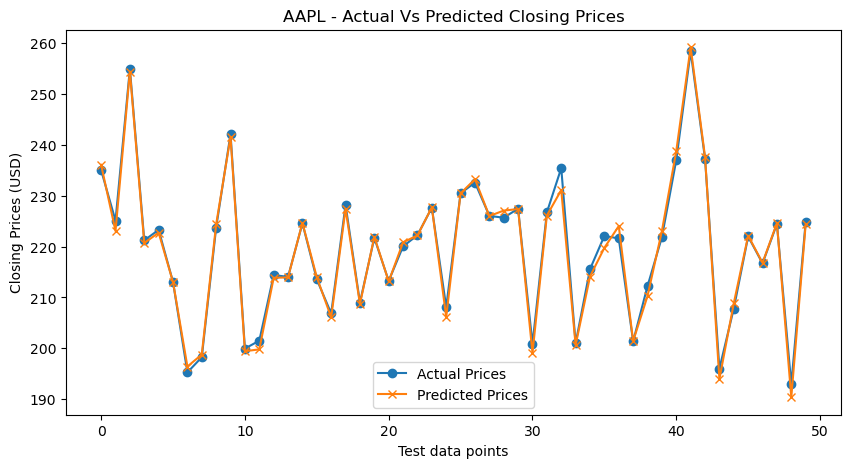

In [19]:
# Comparing & Plotting actual vs predicted closing prices for comparison

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label= 'Actual Prices', marker= 'o') # real closing prices
plt.plot(predictions, label= 'Predicted Prices', marker= 'x') # predicted closing prices
plt.title(f'{stock_symbol} - Actual Vs Predicted Closing Prices')
plt.xlabel('Test data points')
plt.ylabel('Closing Prices (USD)')
plt.legend()
plt.show()

In [22]:
# Predicting the next day prices

last_row=df[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1,-1) #using the last row of the dataset as input

#predicting next day's prices
next_day_price= model.predict(last_row)
print(f"Predicted Next Day Price for {stock_symbol}: ${float(next_day_price[0]):.2f}")



Predicted Next Day Price for AAPL: $227.53


C:\Users\Khizar Junaid\AppData\Local\Temp\ipykernel_6152\1833357191.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Next Day Price for {stock_symbol}: ${float(next_day_price[0]):.2f}")
